<a href="https://colab.research.google.com/github/melikeatac/DerinOgrenmeProject/blob/main/DeepLearningGarbage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten,Activation
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Found 1881 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 

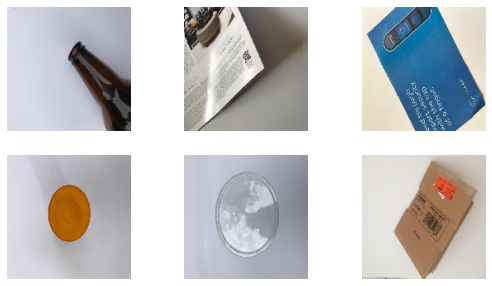

In [ ]:
train_path='./drive/MyDrive/DERİN-ÖĞRENME/Dataset/train'
test_path='./drive/MyDrive/DERİN-ÖĞRENME/Dataset/test'
train_datagen=ImageDataGenerator(
    rescale=1./255, 
    zoom_range=0.2, 
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
    )
val_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)
test_datagen=ImageDataGenerator(rescale=1./255)

#Verileri elde etme kısmı;
train_generator=train_datagen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=(150,150),
    class_mode="categorical", 
    batch_size=8,
    subset="training"
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    class_mode="categorical",
    batch_size=8,
    subset="validation"
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    class_mode="categorical", 
    batch_size=1
)

print(val_generator.class_indices)
print(val_generator.classes)
print(test_generator.classes)
print(train_generator.classes)


plt.figure(figsize=(9,5))
for i in range(6):
  img,y=val_generator.next()
  print(img.shape)
  print(y.shape)
  print(list(y[:6][0]).index(1))
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.imshow(img[0])



In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

model.summary()
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//8, 
    epochs=120,
    validation_data=val_generator,
    validation_steps=val_generator.samples//8
  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 3

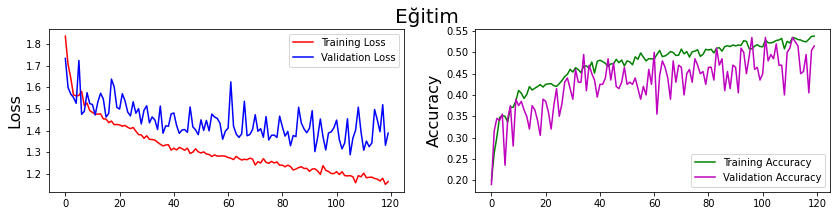

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[10 18  6 26 18  3]
 [13 16 17 35 16  4]
 [13 16  9 28 16  0]
 [14 24 14 47 19  1]
 [13 26 11 31 15  2]
 [ 2  6  3 11  5  1]]


In [ ]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.15      0.12      0.14        81
           1       0.15      0.16      0.15       101
           2       0.15      0.11      0.13        82
           3       0.26      0.39      0.32       119
           4       0.17      0.15      0.16        98
           5       0.09      0.04      0.05        28

    accuracy                           0.19       509
   macro avg       0.16      0.16      0.16       509
weighted avg       0.18      0.19      0.18       509

